# Analyzing my Netflix Activity

I am a big fan of the tv show [New Girl](https://en.wikipedia.org/wiki/New_Girl), don't judge me. I like funny sitcom and the show happen to be funny. I can honestly say that it's the show I've watched the most in my Netflix account. I found out via Twitter that Netflix allows its users to download their account data, in that data there's a csv file called ViewingActivity which contains activities of all the profiles in an account. I have 5 profiles in my account, and for this analysis, we are going to focus on my profile named "nelson". 

### Goals: 
 * The main goal of this project is to find out how much time I have spent watching New Girl between 2017-2020.
 * During which month of which year I've watched New Girl the most(It'll probably be between March and August 2020, covid-19 quarantine).
 * Which episode I've watched the most?
 
 
#### Columns:
 * Profile Name: the name of the profile in which viewing occurred.
 * Start Time: the UTC date and time viewing started.
 * Duration: the length of the viewing session.
 * Attributes: this column shows additional details of interactions with streamed content, where available:
       * "Autoplayed: user action: None" - means that the viewer did not interact with that TV show or movie.
       * "Autoplayed: user action: Unspecified" - means that the viewer either interacted with the TV show or movie
       * "Autoplayed: user action: User_Interaction": means that the viewer interacted with the TV show or movie by 
       clicking on the video player control. 
       * "View was hidden": indicates that the tv show or movie was marked "hide from viewing activity" in account settings
       * "Has branched playback": means the viewer can make choices during playback to control what happen next.
 * Title: TV show or movie viewed
 * Supplemental video type: video other than the actual movie or show, such as trailers or montages. "N/A" means not applicable
 * Device Type: device used to stream the video
 * Bookmark: the most recent viewing position relative to the total length of the show or movie
 * Latest Bookmark: Indicate if the bookmark is the most recent viewing position. "Not latest view" indicate that the bookmark is no the most recent.
 * Country: country where the video was viewed.
 

### Exploring the data

In [1]:
import pandas as pd
import numpy as np

my_netflix_activity = pd.read_csv(r'C:\Users\nelso\Desktop\My Datasets Project\Netflix\Content_Interaction\ViewingActivity.csv')
print(my_netflix_activity.shape)
my_netflix_activity.head()

(13838, 10)


,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,muanango,2020-11-07 11:34:05,00:00:20,Autoplayed: user action: None;,Trailer: Citation,TRAILER,Chrome PC (Cadmium),00:00:20,00:00:20,"CD (Congo, The Democratic Republic of the)"
1,muanango,2020-11-07 11:33:09,00:00:12,Autoplayed: user action: None;,Resurrection: Ertuğrul: Season 1_hook_primary_...,HOOK,Chrome PC (Cadmium),00:00:12,00:00:12,"CD (Congo, The Democratic Republic of the)"
2,muanango,2020-11-07 10:58:08,00:31:09,NaN,Spartacus: War of the Damned: Victory (Episode...,NaN,Chrome PC (Cadmium),00:57:24,00:57:24,"CD (Congo, The Democratic Republic of the)"
3,muanango,2020-11-07 10:55:05,00:01:32,Autoplayed: user action: None;,Trailer: Citation,TRAILER,Chrome PC (Cadmium),00:00:00,Not latest view,"CD (Congo, The Democratic Republic of the)"
4,fatuma,2020-11-07 07:08:58,00:00:09,Autoplayed: user action: None;,The Parkers: Season 1_hook_primary_16x9,HOOK,Samsung CE 2019 Muse-M RU8000 5.1 Smart TV,00:00:09,00:00:09,US (United States)


We can see that the data has 13838 rows and 10 columns. 

This Netflix account has 5 profiles, as I said ealier we are going to focus only on my profile "Nelson"(I own the account and they don't even chip in). I'll save all of Nelson's activities in a separate variable. 

In [2]:
#focus on the profile named Nelson

my_netflix_activity["Profile Name"].unique()

array(['muanango', 'fatuma', 'Nelson', 'Fun Guy', 'Jacques'], dtype=object)

In [3]:
nelson_netflix = my_netflix_activity[my_netflix_activity["Profile Name"] == "Nelson"]
nelson_netflix.reset_index(inplace=True, drop=True)
print(nelson_netflix.shape)
nelson_netflix.head()

(5928, 10)


,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Nelson,2020-11-07 05:42:19,00:21:10,Autoplayed: user action: Unspecified;,The Office (U.S.): Season 2: The Client (Episo...,NaN,Comcast X1 ARM 4K MVPD STB,00:21:07,00:21:07,US (United States)
1,Nelson,2020-11-07 05:07:50,00:21:05,Autoplayed: user action: Unspecified;,The Office (U.S.): Season 2: The Fight (Episod...,NaN,Comcast X1 ARM 4K MVPD STB,00:21:29,00:21:29,US (United States)
2,Nelson,2020-11-07 04:26:37,00:21:06,Autoplayed: user action: Unspecified;,The Office (U.S.): Season 2: Halloween (Episod...,NaN,Comcast X1 ARM 4K MVPD STB,00:21:31,00:21:31,US (United States)
3,Nelson,2020-11-07 04:23:38,00:00:53,Autoplayed: user action: Unspecified;,Vampires: Season 1: I'm a Monster (Episode 2),NaN,Comcast X1 ARM 4K MVPD STB,00:12:27,00:12:27,US (United States)
4,Nelson,2020-11-07 03:35:38,00:22:33,Autoplayed: user action: None;,Beowulf,NaN,Comcast X1 ARM 4K MVPD STB,00:22:33,00:22:33,US (United States)


Now we are left with 5928 rows.

### Dropping unnecessary columns

For the purpose of this project we are going to drop columns that we are not going to use. We'll only focus on 'Start Time', 'Duration', and 'Title'. 

In [4]:
my_account = nelson_netflix.drop(["Profile Name", "Attributes", "Supplemental Video Type", "Device Type", "Bookmark", "Latest Bookmark", "Country"], axis = 1)
my_account.head()

,Start Time,Duration,Title
0,2020-11-07 05:42:19,00:21:10,The Office (U.S.): Season 2: The Client (Episo...
1,2020-11-07 05:07:50,00:21:05,The Office (U.S.): Season 2: The Fight (Episod...
2,2020-11-07 04:26:37,00:21:06,The Office (U.S.): Season 2: Halloween (Episod...
3,2020-11-07 04:23:38,00:00:53,Vampires: Season 1: I'm a Monster (Episode 2)
4,2020-11-07 03:35:38,00:22:33,Beowulf


### Titles

One thing I notice is that the titles are very specific for tv shows. If you look at the example above, "The Office" is a tv show and its title include: main title, season number, and the episode title. So for the purpose of this project, we'll extract all the titles that include the words "New Girl" and forget about the rest.

In [5]:
new_girl_view = my_account[my_account["Title"].str.contains("New Girl", regex=False)]
new_girl_view.reset_index(inplace=True, drop=True)
print(new_girl_view.shape)
new_girl_view.head()

(1344, 3)


,Start Time,Duration,Title
0,2020-11-05 16:33:49,00:02:28,New Girl: Season 7: Mario (Episode 6)
1,2020-11-05 16:11:59,00:21:47,New Girl: Season 7: Godparents (Episode 5)
2,2020-11-05 16:11:47,00:00:01,New Girl: Season 7: Engram Pattersky (Episode 8)
3,2020-11-04 10:19:26,00:00:03,New Girl: Season 7: Engram Pattersky (Episode 8)
4,2020-11-04 09:57:40,00:21:43,New Girl: Season 7: The Curse of the Pirate Br...


### Converting string dates to Datetime and timedelta

We are left with 1344 rows and 3 columns. The 'Start Time' and 'Duration' column have data stored as objects which means they're strings. We can't do any sort of time calculation with strings, so we have to convert those two columns into the proper format. Also, we need to convert times stored in 'Start Time' from UTC to my timezone(Eastern Time).

 * Convert Start Time to datetime (a data and time format pandas can understand and perform calculations with)
 * Convert Start Time from UTC to our local timezone
 * Convert Duration to timedelta (a time duration format pandas can understand and perform calculations with)

In [6]:
new_girl_view.dtypes

Start Time    object
Duration      object
Title         object
dtype: object

In [7]:
import datetime as dt
pd.reset_option('mode.chained_assignment')
with pd.option_context('mode.chained_assignment', None):
    new_girl_view["Start Time"] = pd.to_datetime(new_girl_view["Start Time"], utc=True)

In [8]:
# converting from UTC to Eastern Time
new_girl_view = new_girl_view.set_index('Start Time')
new_girl_view.index = new_girl_view.index.tz_convert("US/Eastern")
new_girl_view = new_girl_view.reset_index()

# converting Duration to timedelta
new_girl_view["Duration"] = pd.to_timedelta(new_girl_view["Duration"])

print(new_girl_view.dtypes)
new_girl_view.head()

Start Time    datetime64[ns, US/Eastern]
Duration                 timedelta64[ns]
Title                             object
dtype: object


,Start Time,Duration,Title
0,2020-11-05 11:33:49-05:00,00:02:28,New Girl: Season 7: Mario (Episode 6)
1,2020-11-05 11:11:59-05:00,00:21:47,New Girl: Season 7: Godparents (Episode 5)
2,2020-11-05 11:11:47-05:00,00:00:01,New Girl: Season 7: Engram Pattersky (Episode 8)
3,2020-11-04 05:19:26-05:00,00:00:03,New Girl: Season 7: Engram Pattersky (Episode 8)
4,2020-11-04 04:57:40-05:00,00:21:43,New Girl: Season 7: The Curse of the Pirate Br...


We can see this is correct because the previous first row in our dataset had a Start Time of **2020-11-05 16:33:49**. During Daylight Savings Time, the U.S. Eastern time zone is four hours behind UTC, so we can see that our conversion has happened correctly! We also converted Duration from string to timedelta

### Filtering out very short durations

As you can see below, we also noticed that there are durations of one second or less than a minute. That is because of the auto-play when you hover over a vidoe in Netflix, like a preview. We are going to filter our data and only keep videos watched for 1 minute or more.

In [9]:
new_girl_view[new_girl_view["Duration"] == "0 days 00:00:01"][:5]

,Start Time,Duration,Title
2,2020-11-05 11:11:47-05:00,00:00:01,New Girl: Season 7: Engram Pattersky (Episode 8)
13,2020-10-29 09:38:18-04:00,00:00:01,New Girl: Season 2: Tinfinity (Episode 18)
22,2020-10-26 18:08:39-04:00,00:00:01,New Girl: Season 2: A Father's Love (Episode 13)
74,2020-09-29 23:53:20-04:00,00:00:01,New Girl: Season 4: Teachers (Episode 8)
191,2020-08-12 06:36:57-04:00,00:00:01,New Girl: Season 3: Menus (Episode 8)


In [10]:
# filtering out short videos

my_views = new_girl_view[new_girl_view["Duration"] >= "0 days 00:01:00"]
my_views.shape

(1162, 3)

### Analyzing the data

##### How much time I have spent watching New Girl?

In [11]:
my_views["Duration"].sum()

Timedelta('12 days 19:20:35')

I've spent a total of 12 days, 19hrs watching New Girl. I was expecting more. Keep in mind one episode last around 20-22 minutes and there are 6 seasons of 20+ episodes and 1 seasons of 7 episodes. Looks like I'm not obsessed as I thought I was. I was expecting more because it is the only show in Netflix that I keep re-watching. 

### When Do I watch New Girl?

 * On which day of the week do I watch the most?
 * During which hour of the day do I watch the most?
 
We'll focus on the "Start Time" column. Extract the days and hours and stored them into two columns named "weekday" and "hour". We'll use datetime.weekday and datetime.hour to extract those values. Using datetime.weekday will give us the number corresponding to the day of the week. So 1 will for Monday and so on...We'll convert the numbers to the names of the days(Monday,Tuesday...)

In [12]:
pd.reset_option('mode.chained_assignment')
with pd.option_context('mode.chained_assignment', None):
    my_views["Weekday"] = my_views["Start Time"].dt.weekday
    my_views["hour"] = my_views["Start Time"].dt.hour
    my_views["month"] = my_views["Start Time"].dt.month
    my_views["year"] = my_views["Start Time"].dt.year

In [13]:
my_views[:10]

,Start Time,Duration,Title,Weekday,hour,month,year
0,2020-11-05 11:33:49-05:00,00:02:28,New Girl: Season 7: Mario (Episode 6),3,11,11,2020
1,2020-11-05 11:11:59-05:00,00:21:47,New Girl: Season 7: Godparents (Episode 5),3,11,11,2020
4,2020-11-04 04:57:40-05:00,00:21:43,New Girl: Season 7: The Curse of the Pirate Br...,2,4,11,2020
5,2020-11-04 04:35:53-05:00,00:21:43,New Girl: Season 7: Mario (Episode 6),2,4,11,2020
6,2020-11-04 04:14:04-05:00,00:21:47,New Girl: Season 7: Godparents (Episode 5),2,4,11,2020
7,2020-11-03 01:45:48-05:00,00:01:06,New Girl: Season 2: Elaine's Big Day (Episode 25),1,1,11,2020
8,2020-11-03 01:23:58-05:00,00:21:44,New Girl: Season 2: Winston's Birthday (Episod...,1,1,11,2020
9,2020-11-01 06:24:32-05:00,00:08:43,New Girl: Season 2: Bachelorette Party (Episod...,6,6,11,2020
10,2020-11-01 06:02:40-05:00,00:21:41,New Girl: Season 2: First Date (Episode 21),6,6,11,2020
12,2020-10-29 09:39:00-04:00,00:22:17,New Girl: Season 2: Chicago (Episode 20),3,9,10,2020


In [14]:
weekdays = {
    1:"Monday",
    2:"Tuesday",
    3:"Wednesday",
    4:"Thursday",
    5:"Friday",
    6:"Saturday",
    0:"Sunday"
}
pd.reset_option('mode.chained_assignment')
with pd.option_context('mode.chained_assignment', None):
    my_views["Weekday"] = my_views["Weekday"].map(weekdays)

In [15]:
my_views[:5]

,Start Time,Duration,Title,Weekday,hour,month,year
0,2020-11-05 11:33:49-05:00,00:02:28,New Girl: Season 7: Mario (Episode 6),Wednesday,11,11,2020
1,2020-11-05 11:11:59-05:00,00:21:47,New Girl: Season 7: Godparents (Episode 5),Wednesday,11,11,2020
4,2020-11-04 04:57:40-05:00,00:21:43,New Girl: Season 7: The Curse of the Pirate Br...,Tuesday,4,11,2020
5,2020-11-04 04:35:53-05:00,00:21:43,New Girl: Season 7: Mario (Episode 6),Tuesday,4,11,2020
6,2020-11-04 04:14:04-05:00,00:21:47,New Girl: Season 7: Godparents (Episode 5),Tuesday,4,11,2020


C:\Users\nelso\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0.5, 1.0, 'New Girl episodes watched by day')

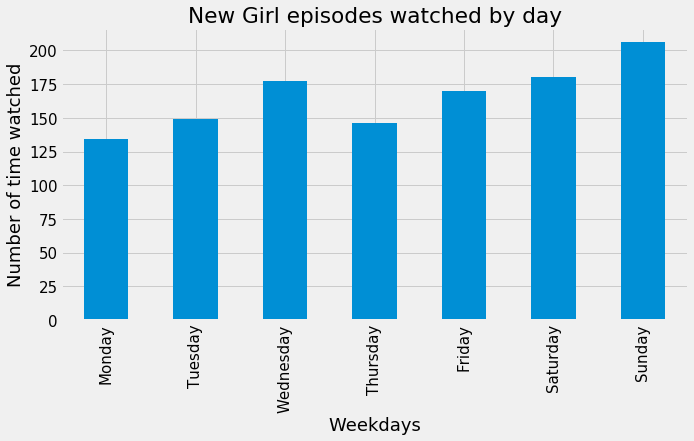

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use("fivethirtyeight")

# set categories and order the days from Mon-Sun
my_views["Weekday"] = pd.Categorical(my_views["Weekday"], categories = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"
                                                                        ,"Saturday","Sunday"], ordered = True)

# count the rows for each day of the week
watch_by_day = my_views['Weekday'].value_counts()

# sort the index using our category, so that Monday is 0, Tuesday is 2 and so on...
watch_by_day = watch_by_day.sort_index()

# optional: update the font size to make it a bit larger and easier to read
plt.rcParams.update({'font.size': 15})
watch_by_day.plot(kind="bar", figsize=(10,5))
plt.xlabel("Weekdays")
plt.ylabel("Number of time watched")
plt.title("New Girl episodes watched by day")

In [17]:
watch_by_day

Monday       134
Tuesday      149
Wednesday    177
Thursday     146
Friday       170
Saturday     180
Sunday       206
Name: Weekday, dtype: int64

No suprise here, I was expecting Saturday and Sunday to be on top. I watch a lot of tv during the weekend. For wednesday, i'd say it just a way to relax mid_week. Now let's look at the hour of the day, the process is very similar. 

C:\Users\nelso\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Number of episodes watched')

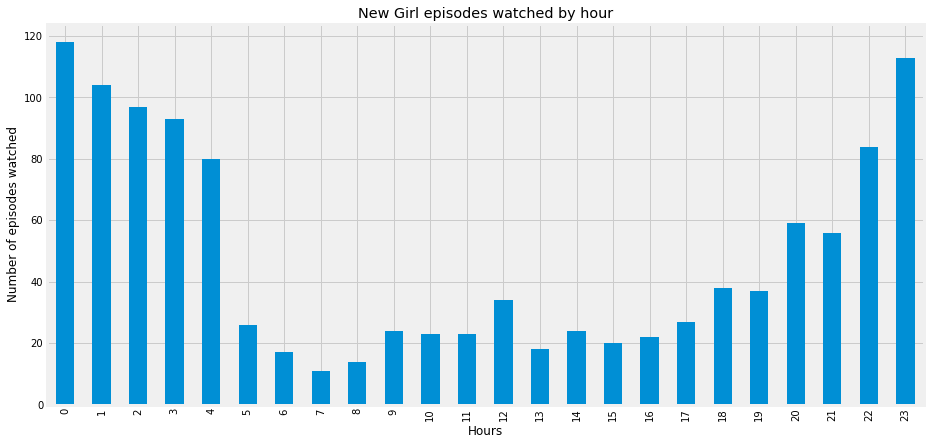

In [18]:
# define the order of the hours 0-23
my_views["hour"] = pd.Categorical(my_views['hour'], categories = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],
    ordered=True)

# count the rows for each hour
watch_by_hour = my_views["hour"].value_counts()

# sort the index, so that midnight is 0, 1am is 1 and so on...
watch_by_hour = watch_by_hour.sort_index()

# graph
watch_by_hour.plot(kind="bar", figsize=(14,7))
plt.title("New Girl episodes watched by hour")
plt.xlabel("Hours")
plt.ylabel("Number of episodes watched")

Ok don't be too quick to judge. I always have a hard time sleeping at night and the quarantine hasn't helped that much. Watching tv late at night helps me fall asleep. I've also stayed awake all night multiple times, especially this year. 

We're working with dates and time, now let's answer our second question: During which month of which year I've watched New Girl the most? Remember that I started watching since 2017. We'll group our dataset per year, count the numbers of times i've watched the show per month during a given year, then visualize the result. Keep in mind that the months are written in numbers (1 for January, 2 for February and so on)

In [19]:
my_views_2017 = my_views[my_views["year"] == 2017].copy()
my_views_2018 = my_views[my_views["year"] == 2018].copy()
my_views_2019 = my_views[my_views["year"] == 2019].copy()
my_views_2020 = my_views[my_views["year"] == 2020].copy()

In [20]:
print("2017:")
print(my_views_2017["month"].value_counts(ascending= False))
print("\n")
print("2018:")
print(my_views_2018["month"].value_counts(ascending= False))
print("\n")
print("2019")
print(my_views_2019["month"].value_counts(ascending= False))
print("\n")
print("2020")
print(my_views_2020["month"].value_counts(ascending= False))

2017:
9     23
11    13
12     4
10     1
Name: month, dtype: int64


2018:
12    75
11    67
4     56
9     46
3     43
10    37
8     28
2     24
6     12
7      7
1      5
5      2
Name: month, dtype: int64


2019
10    88
12    55
1     52
11    43
9     21
4     17
8     16
2     10
3      6
5      4
7      2
6      1
Name: month, dtype: int64


2020
9     72
5     51
1     50
10    41
6     41
2     38
8     35
4     33
3     23
7     11
11     9
Name: month, dtype: int64


As you can see above, I've watched New Girl the most during October 2019. Come to think of it, it was also during October 2019 that I had to stop working because of Immigration (I always have a reason lol), so I had plenty of time. I was expecting it'd be a month in 2020 because of quarantine but looks like I was mistaken, but looking at the result above I'm sure I've watched this show the most during 2020. Let's find out

In [21]:
my_views["year"].value_counts()

2020    404
2018    402
2019    315
2017     41
Name: year, dtype: int64

Well I knew 2020 would come on top but I wasn't expecting 2018 to be so close with the number of streaming this tv show. Even more surprising is the fact that earlier we found out that it was in October 2019 that I've watched this show the most but overall the number streaming of declined considerably compare to 2018 and 2020.

In [22]:
round(my_views["year"].value_counts(ascending=False, normalize=True) * 100, 2)

2020    34.77
2018    34.60
2019    27.11
2017     3.53
Name: year, dtype: float64

You can tell there was a 7% decline in streaming in 2019, but I picked it up again with another 7% increase in streaming in 2020. The year 207 is so low because as I said earlier, I started watching the show in September 2017, so there isn't a lot of data for that year. Also, as I'm doing this analysis, the year 2020 is not over yet, which means the number of streaming could go up a little. 

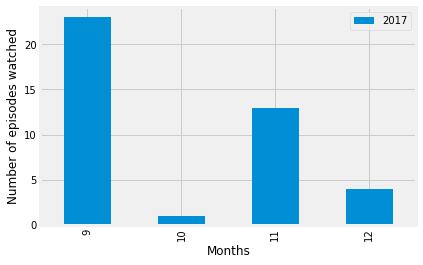

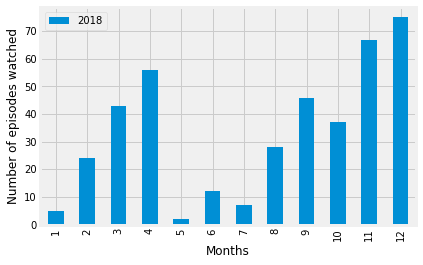

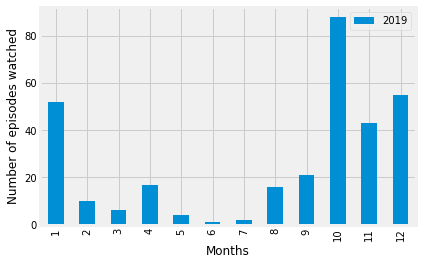

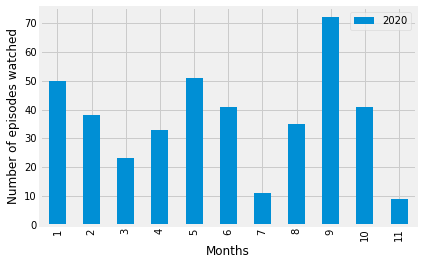

In [23]:
fig1 = plt.figure(1)
my_views_2017["month"].value_counts().sort_index().plot(kind="bar", label = "2017")
plt.xlabel("Months")
plt.ylabel("Number of episodes watched")
plt.legend()

fig2 = plt.figure(2)
my_views_2018["month"].value_counts().sort_index().plot(kind="bar", label = "2018")
plt.xlabel("Months")
plt.ylabel("Number of episodes watched")
plt.legend()

fig3 = plt.figure(3)
my_views_2019["month"].value_counts().sort_index().plot(kind="bar", label = "2019")
plt.xlabel("Months")
plt.ylabel("Number of episodes watched")
plt.legend()

fig4 = plt.figure(4)
my_views_2020["month"].value_counts().sort_index().plot(kind="bar", label = "2020")
plt.xlabel("Months")
plt.ylabel("Number of episodes watched")
plt.legend()

plt.show()

We've answered the first two questions of our analysis. So far, we know that I've spent a total of 12 days, 19hrs watching New Girl. October 2019 was the month I streamed this show the most on Netflix. Now let's find out which episode I've watched the most.

In [24]:
my_views["Title"].value_counts(ascending=False)

New Girl: Season 3: Cruise (Episode 23)                          25
New Girl: Season 4: The Last Wedding (Episode 1)                 17
New Girl: Season 4: Julie Berkman's Older Sister (Episode 3)     17
New Girl: Season 1: Cece Crashes (Episode 5)                     17
New Girl: Season 4: Thanksgiving IV (Episode 9)                  16
New Girl: Season 2: Re-Launch (Episode 1)                        16
New Girl: Season 1: Tomatoes (Episode 22)                        16
New Girl: Season 4: Goldmine (Episode 7)                         14
New Girl: Season 3: Prince (Episode 14)                          14
New Girl: Season 4: Micro (Episode 4)                            14
New Girl: Season 6: Socalyalcon VI (Episode 19)                  13
New Girl: Season 1: Normal (Episode 20)                          13
New Girl: Season 4: Teachers (Episode 8)                         13
New Girl: Season 4: Dice (Episode 2)                             13
New Girl: Season 2: Bathtub (Episode 10)        

I didn't know what to expect but I can't say I'm surprised. The episode titled "Cruise" is the season 3 finale and I find it funny, and the second most watched episode is named "The Last Wedding" is also a funny one, and it is the Season 4 premiere. So if I've watched season 3 finale the most, chances are I just went straight into the next one which is Season 4 premiere and that's probably why it is high on the list of the most watched episodes. 

### Most watched season

I know we've reached our goal and answered all the questions we had in the introduction but I also wanted to find out which season I've watched the most.

In [25]:
# split the string title and extract the second values in the list
my_views["season"] = my_views["Title"].str.split(":", expand = True)[1] 
my_views.head(10)

C:\Users\nelso\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Start Time,Duration,Title,Weekday,hour,month,year,season
0,2020-11-05 11:33:49-05:00,00:02:28,New Girl: Season 7: Mario (Episode 6),Wednesday,11,11,2020,Season 7
1,2020-11-05 11:11:59-05:00,00:21:47,New Girl: Season 7: Godparents (Episode 5),Wednesday,11,11,2020,Season 7
4,2020-11-04 04:57:40-05:00,00:21:43,New Girl: Season 7: The Curse of the Pirate Br...,Tuesday,4,11,2020,Season 7
5,2020-11-04 04:35:53-05:00,00:21:43,New Girl: Season 7: Mario (Episode 6),Tuesday,4,11,2020,Season 7
6,2020-11-04 04:14:04-05:00,00:21:47,New Girl: Season 7: Godparents (Episode 5),Tuesday,4,11,2020,Season 7
7,2020-11-03 01:45:48-05:00,00:01:06,New Girl: Season 2: Elaine's Big Day (Episode 25),Monday,1,11,2020,Season 2
8,2020-11-03 01:23:58-05:00,00:21:44,New Girl: Season 2: Winston's Birthday (Episod...,Monday,1,11,2020,Season 2
9,2020-11-01 06:24:32-05:00,00:08:43,New Girl: Season 2: Bachelorette Party (Episod...,Saturday,6,11,2020,Season 2
10,2020-11-01 06:02:40-05:00,00:21:41,New Girl: Season 2: First Date (Episode 21),Saturday,6,11,2020,Season 2
12,2020-10-29 09:39:00-04:00,00:22:17,New Girl: Season 2: Chicago (Episode 20),Wednesday,9,10,2020,Season 2


 Season 4    219
 Season 1    212
 Season 3    205
 Season 2    195
 Season 6    152
 Season 5    143
 Season 7     36
Name: season, dtype: int64


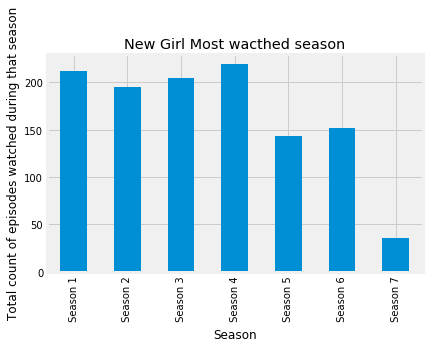

In [ ]:
print(my_views["season"].value_counts())
my_views["season"].value_counts().sort_index().plot(kind = "bar")
plt.xlabel("Season")
plt.ylabel("Total count of episodes watched during that season")
plt.title("New Girl Most wacthed season")
plt.show()

Season 4 of New Girl is the season I've watched the most. The reason I think is because one of my favorite character in the show makes a return and I like seeing all the cast together during that season. Season 7 comes last because I didn't really like it and it only has 7 episodes. 

### Conclusion

We went into my Netflix account and analyzed New Girl, a tv show I've streamed the most in Netflix (movies and tv shows combined) between September 2017 and October 2020. Keep in mind that we removed anything that streamed for less than 1 minutes. If we kept streams that lasted less than 1 min, the result would  have been different. 

##### We had 3 goals:

 * How much time I have spent watching New Girl between 2017-2020.
 * During which month of which year I've watched New Girl the most(It'll probably be between March and August 2020, covid-19 quarantine).
 * Which episode I've watched the most?
 
#####  Answers:

 1. I've spent 12 days, 19hrs, 20minutes watching this show. I was expecting more but a little bit relieved that I'm not obsessed as I thought I was.
 2. October 2019 is the month during which I've streamed this show the most
 3. Season 3 : Episode 23 "Cruise" is the episode I've watched the most. Season 4 is the most wacthed season of this show.